<a href="https://colab.research.google.com/github/barkha0/TSF-DataScience-Task1/blob/main/GRIP_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science and Bussiness Analytics
##GRIP Task1 #Augustbatch21

# Prediction Using Supervised Machine Learning

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [55]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [56]:
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [57]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [58]:
dataset.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [59]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [60]:
dataset.tail(4)

,Hours,Scores
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [61]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [62]:
dataset.shape

(25, 2)

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [64]:
dataset.min()

Hours      1.1
Scores    17.0
dtype: float64

In [65]:
dataset.max()

Hours      9.2
Scores    95.0
dtype: float64

In [66]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [67]:
dataset.iloc[11:19]

,Hours,Scores
11,5.9,62
12,4.5,41
13,3.3,42
14,1.1,17
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67


In [68]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [69]:
dataset.nunique()

Hours     23
Scores    23
dtype: int64

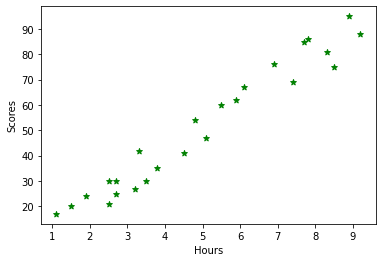

In [70]:
x = dataset['Hours']
y = dataset['Scores']
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x,y,color='green',marker='*')
plt.show()

# Spliting of Dataset into testing and training

In [71]:
x = dataset.iloc[:,:-1].values    #features
y = dataset.iloc[:,1].values      #labels
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [72]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 1/3, random_state = 1)

# Creating Simple Linear Model

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

mymodel = model.fit(xtrain, ytrain)

# Prediction

In [74]:
y_pred = mymodel.predict(xtest)
y_pred

array([10.56351243, 33.29165695, 18.82829225, 87.01272581, 48.78811912,
       78.74794599, 62.21838634, 75.64865355, 35.3578519 ])

# Difference between y_pred is predicted by model and ytest is actual

In [75]:
y_pred

array([10.56351243, 33.29165695, 18.82829225, 87.01272581, 48.78811912,
       78.74794599, 62.21838634, 75.64865355, 35.3578519 ])

In [76]:
ytest

array([17, 42, 24, 75, 54, 85, 67, 69, 30])

In [77]:
mymodel.predict([[8]])

array([81.84723842])

In [78]:
mymodel.coef_

array([10.33097478])

In [79]:
mymodel.intercept_

-0.8005598320503751

In [80]:
#y = mx + c,  x = 9
10.33097478*9 + -0.8005598320503751

92.17821318794964

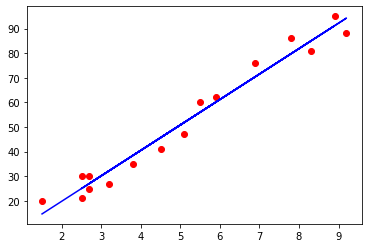

In [81]:
plt.scatter(xtrain,ytrain, color='red')
plt.plot(xtrain,mymodel.predict(xtrain), color='blue')
plt.show()

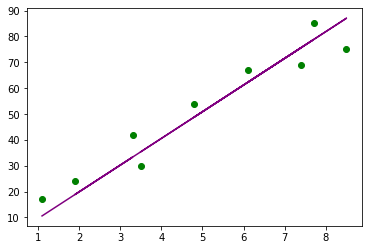

In [86]:
plt.scatter(xtest,ytest,color='green')
plt.plot(xtest,mymodel.predict(xtest),color='purple')
plt.show()

In [87]:
Hours = 9.25
Scores = mymodel.predict([[Hours]])
print("{} % will be the predicted score if a student studies for {} hrs/ day".format(Scores,Hours))

[94.7609569] % will be the predicted score if a student studies for 9.25 hrs/ day


#Model Evaluation

In [88]:
from sklearn.metrics import r2_score
r = r2_score(ytest,y_pred)
r

0.9047140370739194

In [90]:
from sklearn import metrics
#from sklearn.metrics import r2_score
print("Mean Absolute Error:", metrics.mean_absolute_error(ytest,y_pred))
print("r2 score:",r2_score(ytest,y_pred))

Mean Absolute Error: 6.731257577459272
r2 score: 0.9047140370739194


In [91]:
y_pred = model.predict(xtrain)

In [92]:
y_pred

array([32.25855947, 27.09307208, 94.24440816, 56.01980147, 38.45714434,
       51.88741155, 25.02687712, 25.02687712, 91.14511572, 79.78104346,
       70.48316616, 27.09307208, 84.94653086, 45.68882669, 60.15219138,
       14.69590234])

In [93]:
ytest

array([17, 42, 24, 75, 54, 85, 67, 69, 30])

In [94]:
mymodel.predict([[5]])

array([50.85431408])